## A tutorial on how to establish a SQLite database in Python and use Pandas to access it. 

In [28]:
#import libraries
import sqlite3 as db
import pandas as pd 
import matplotlib.pyplot as plt

### Create database and establish connections to database

In [29]:
#connect to database or create if doesn't exist
conn = db.connect('MIGI_Nanoseq.db')

In [30]:
#create cursor
#Connection.execute
#This is a nonstandard shortcut that creates a cursor object by calling the cursor() method, calls the cursor’s execute() method with the parameters given, and returns the cursor.
c = conn.cursor()

### Create table

In [31]:
#create table called 'employees'
c.execute("CREATE TABLE Seqinfo (SampleID INTEGER PRIMARY KEY, PeojectName NVARCHAR(20), Species NVARCHAR(20), SequeceQC NVARCHAR(20))")


In [32]:
#check that table was successfully created in database
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('Seqinfo',)]


In [33]:
c.execute("INSERT INTO Seqinfo VALUES (12985,'GIF','Eco','Good')")
c.execute("INSERT INTO Seqinfo VALUES (12986,'TIF', 'KPN', 'BAD')")
c.execute("INSERT INTO Seqinfo VALUES (12987,'MIGI', 'ECC', 'GOOD')")

In [34]:
#check data in table
c.execute("SELECT * FROM Seqinfo;")
print(c.fetchall())

[(12985, 'GIF', 'Eco', 'Good'), (12986, 'TIF', 'KPN', 'BAD'), (12987, 'MIGI', 'ECC', 'GOOD')]


In [35]:
new_seq = [(1299, 'GIF', 'KPN','Good'),
 (12988,'TIF', 'KPN', 'Super')]

## Insert new sequence data into database:
##### Also possible if you have the data into a csv file
##### Read the csv file into a pandas dataframe and insert the dataframe directly into the database

In [36]:
# insert new sequence data into database
c.executemany('INSERT INTO Seqinfo VALUES (?, ?, ?,?)', new_seq)

In [37]:
c.execute("SELECT * FROM Seqinfo;")
print(c.fetchall())

[(1299, 'GIF', 'KPN', 'Good'), (12985, 'GIF', 'Eco', 'Good'), (12986, 'TIF', 'KPN', 'BAD'), (12987, 'MIGI', 'ECC', 'GOOD'), (12988, 'TIF', 'KPN', 'Super')]


### Commit changes

In [38]:
conn.commit()

## Close connections

In [17]:
c.close()
conn.close()

## Drop table / Database if you need to

In [39]:
#c.execute("DROP TABLE IF EXISTS Seqinfo")
#Doping EMPLOYEE table if already exists
#cursor.execute("DROP TABLE Seqinfo")
#print("Table dropped... ")
#%rm MIGI_Nanoseq.db

## Connect SQLite db via Pandas
##### Technically you can connect to others types of database also

In [40]:
#Establish connection
con = db.connect('MIGI_Nanoseq.db')

In [41]:
#Perform SQL query and return pandas data frame
df_seq = pd.read_sql_query ('select * from Seqinfo', con)
df_seq.head()

SampleID PeojectName Species SequeceQC
0      1299         GIF     KPN      Good
1     12985         GIF     Eco      Good
2     12986         TIF     KPN       BAD
3     12987        MIGI     ECC      GOOD
4     12988         TIF     KPN     Super

In [42]:
#plot = df_seq.plot.pie(y='Species', figsize=(5, 5))
#Plotting the pie chart for above dataframe
df_seq.groupby(['Species']).sum()

SampleID
Species          
ECC         12987
Eco         12985
KPN         27273

In [43]:
label=df_seq.PeojectName.value_counts().index
#count=df.JobRole.value_counts().values

In [44]:
count=df_seq.PeojectName.value_counts().values

([<matplotlib.patches.Wedge at 0x7fb03b9a5ae0>,
 [Text(0.33991867422268784, 1.0461621742897658, 'GIF'),
  Text(-0.8899186574910393, -0.6465638275138399, 'TIF'),
  Text(0.8899187482945414, -0.6465637025335375, 'MIGI')])

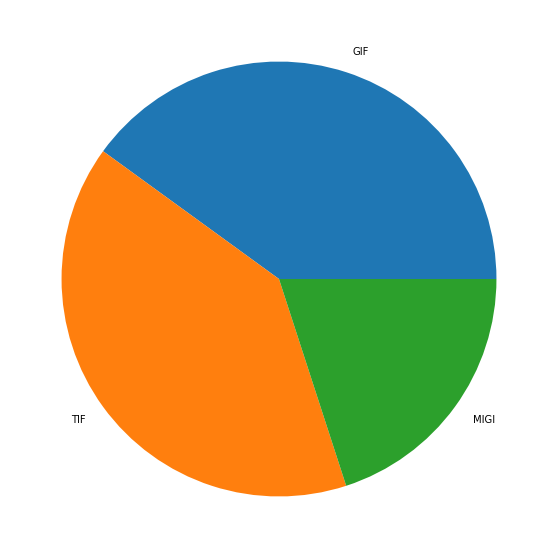

In [46]:
plt.figure(1, figsize=(20,10))
plt.pie(count,labels=label)

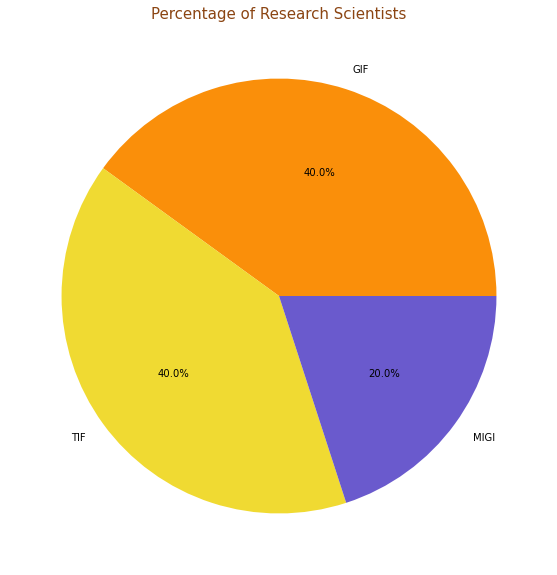

In [47]:
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C']
explode = (0, 0, 0)
plt.figure(1, figsize=(20,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title("Percentage of Research Scientists",color="saddlebrown",fontsize=15)
plt.show()